In [2]:
import pandas as pd

# Load the datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Display the first few rows of each dataset
print("Matches Dataset:")
print(matches.head())

print("\nDeliveries Dataset:")
print(deliveries.head())

# Display basic information about the datasets
print("\nMatches Dataset Info:")
print(matches.info())

print("\nDeliveries Dataset Info:")
print(deliveries.info())


Matches Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrise

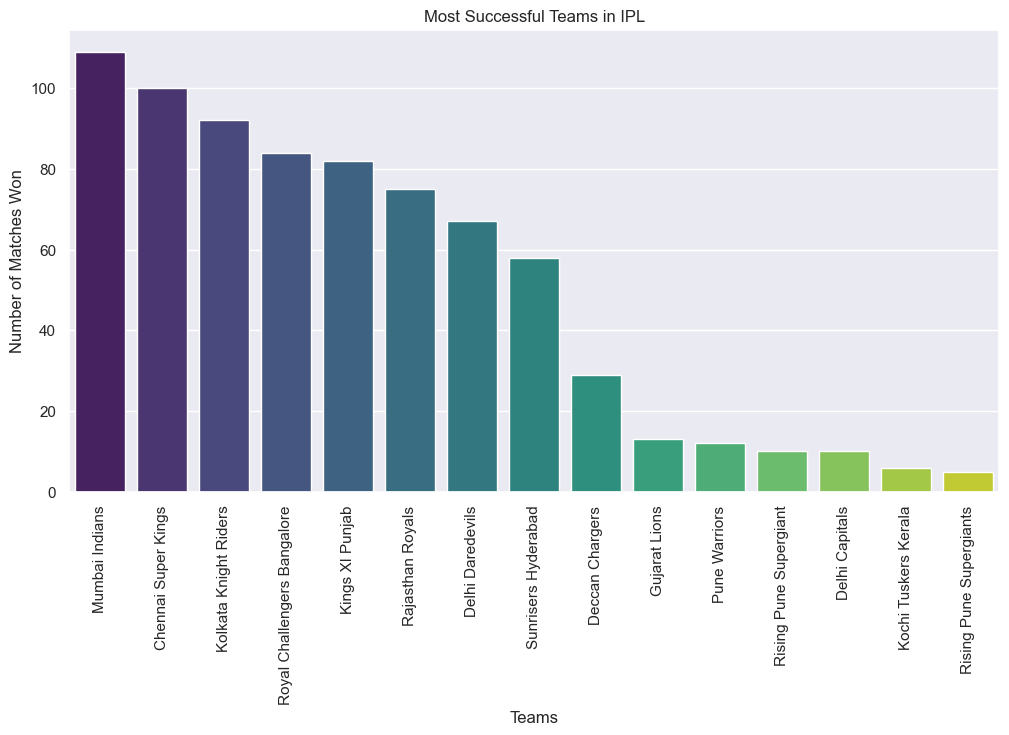

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="darkgrid")

# Most successful teams by the number of matches won
team_wins = matches['winner'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.title('Most Successful Teams in IPL')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=90)
plt.show()


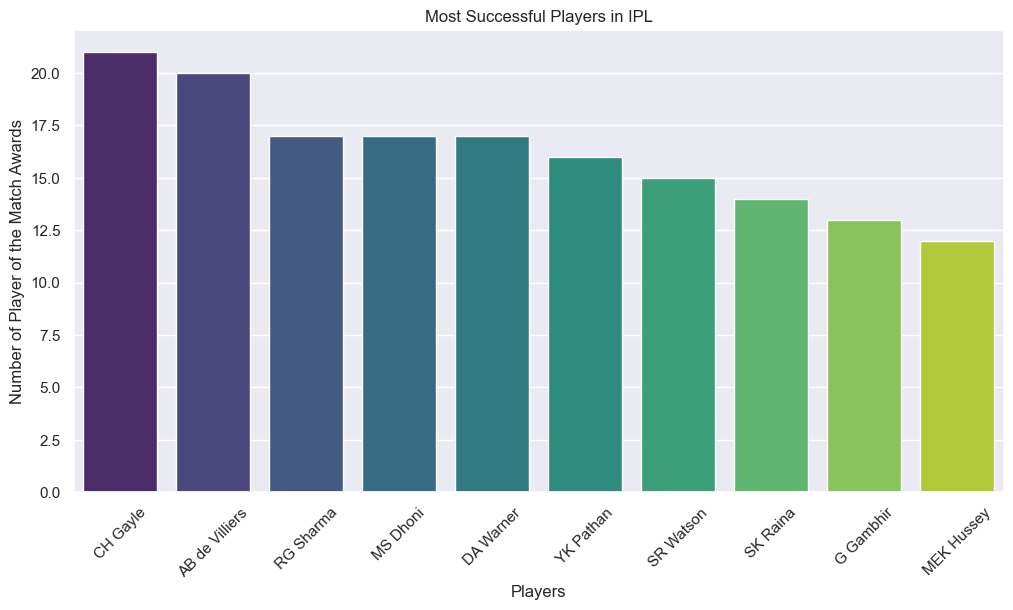

In [4]:
# Most successful players by the number of 'Player of the Match' awards
player_awards = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=player_awards.index, y=player_awards.values, palette="viridis")
plt.title('Most Successful Players in IPL')
plt.xlabel('Players')
plt.ylabel('Number of Player of the Match Awards')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Analyze the impact of winning the toss
toss_impact = matches[matches['toss_winner'] == matches['winner']].shape[0] / matches.shape[0]

print(f"The percentage of matches won by the team winning the toss: {toss_impact * 100:.2f}%")


The percentage of matches won by the team winning the toss: 51.98%


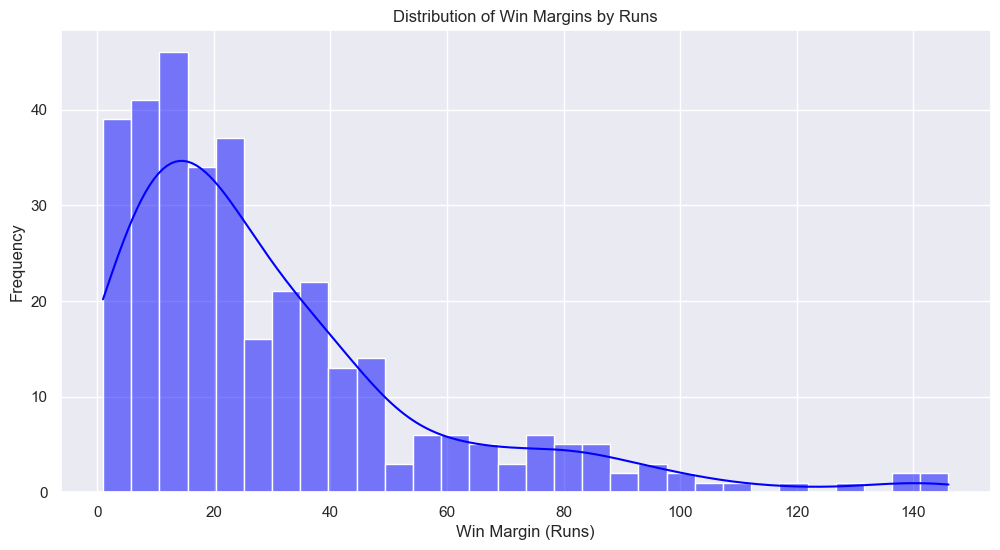

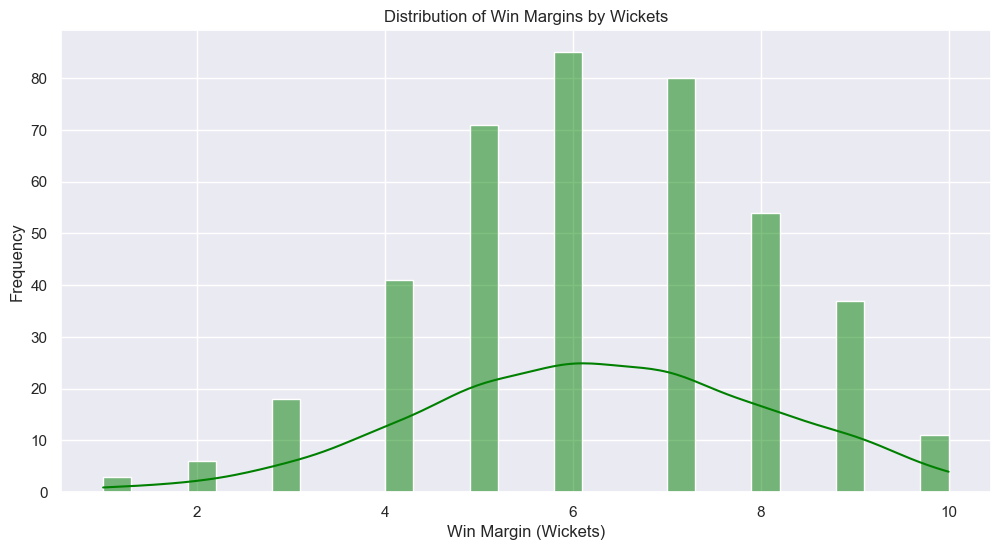

In [6]:
# Win margins by runs
plt.figure(figsize=(12, 6))
sns.histplot(matches[matches['win_by_runs'] > 0]['win_by_runs'], bins=30, kde=True, color='blue')
plt.title('Distribution of Win Margins by Runs')
plt.xlabel('Win Margin (Runs)')
plt.ylabel('Frequency')
plt.show()

# Win margins by wickets
plt.figure(figsize=(12, 6))
sns.histplot(matches[matches['win_by_wickets'] > 0]['win_by_wickets'], bins=30, kde=True, color='green')
plt.title('Distribution of Win Margins by Wickets')
plt.xlabel('Win Margin (Wickets)')
plt.ylabel('Frequency')
plt.show()


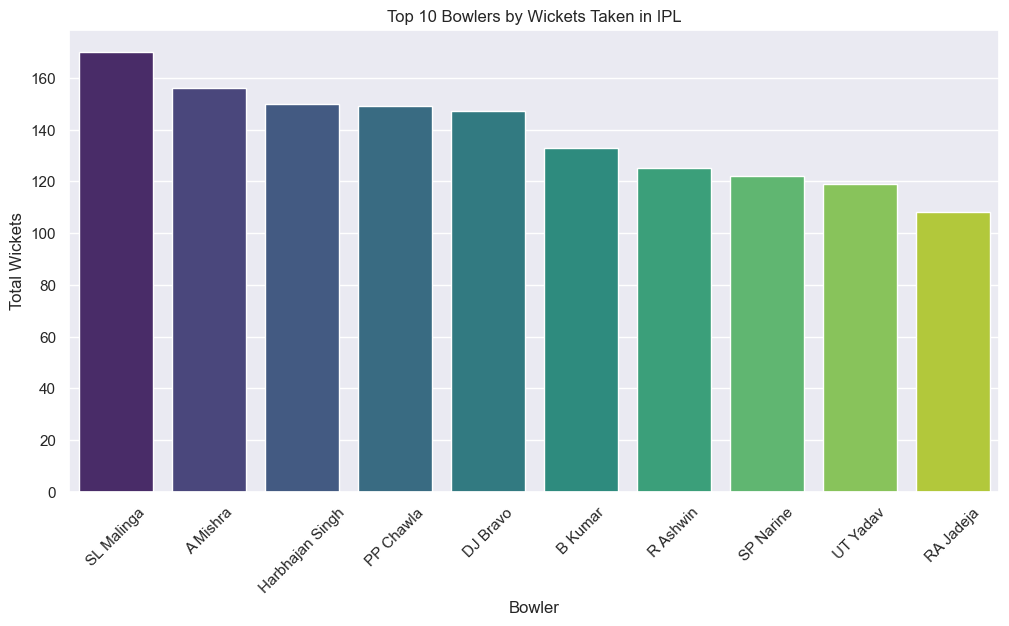

In [8]:
# Most wickets taken by bowlers
bowler_wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_wickets = bowler_wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=bowler_wickets.index, y=bowler_wickets.values, palette="viridis")
plt.title('Top 10 Bowlers by Wickets Taken in IPL')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()


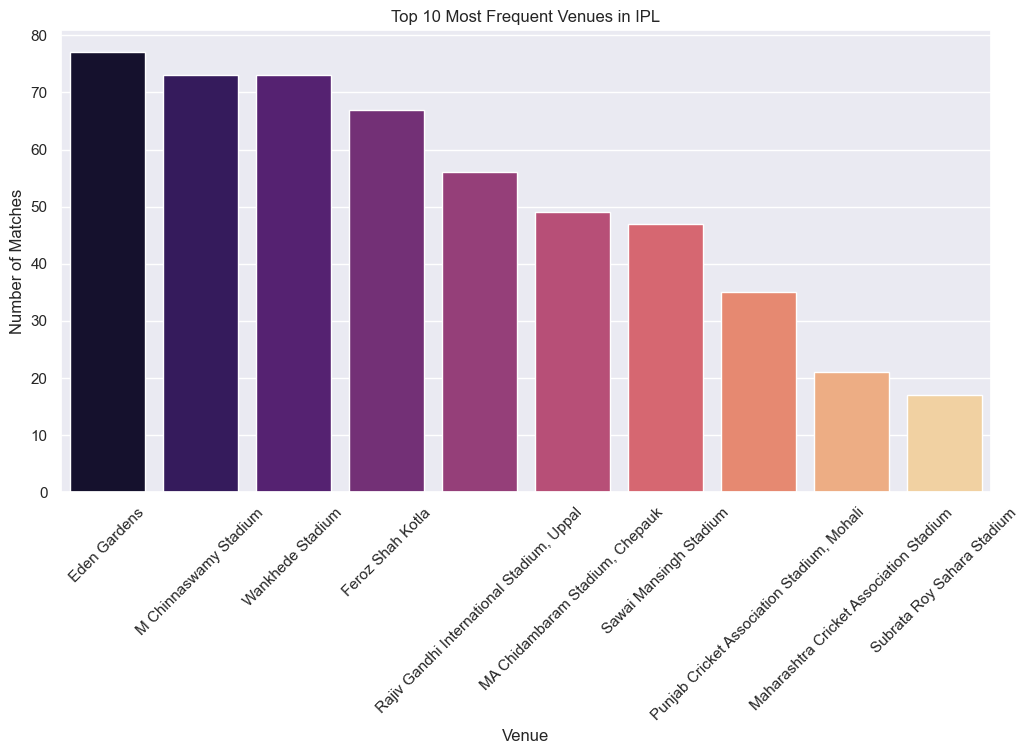

In [9]:
# Most frequent venues
venue_counts = matches['venue'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette="magma")
plt.title('Top 10 Most Frequent Venues in IPL')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()
